In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap

In [2]:
df2 = pd.read_csv('MKB.csv')

In [3]:
df2.head(20)

,Episode,Content,Views,Likes,Dislikes,Cleaned_content,Total_words,Words_without_stop,Year
0,20211024,"My dear countrymen,\nNamaskar…namaskar a billi...",24394,1799,627,dear countrymen namaskar namaskar billion time...,4904,3014,2021
1,20210926,"My dear countrymen,\nNamaskar. You are aware t...",22728,1310,490,dear countrymen namaskar aware important progr...,4266,2564,2021
2,20210829,"My dear countrymen, Namaskar.\nAll of us know ...",12047,416,1156,dear countrymen namaskar us know today birth a...,4579,2799,2021
3,20210725,"My dear countrymen, Namaskar. A few amazing pi...",50659,2332,5577,dear countrymen namaskar amazing pictures take...,4510,2782,2021
4,20210627,"My dear countrymen, Namaskar.\nOften in Mann K...",71155,1828,11115,dear countrymen namaskar often mann ki baat vo...,5572,3451,2021
5,20210530,"My dear countrymen, Namaskar. We are seeing ho...",21935,1373,3320,dear countrymen namaskar seeing country fighti...,6144,3744,2021
6,20210425,"My dear countrymen,\nNamaskar. Today, I am exp...",73773,1257,9463,dear countrymen namaskar today expressing mann...,5367,3296,2021
7,20210328,"My dear countrymen, Namaskar. This time when I...",64025,1119,11393,dear countrymen namaskar time perusing letters...,4347,2726,2021
8,20210228,"My dear countrymen,\nNamaskar. Yesterday was t...",117003,0,0,dear countrymen namaskar yesterday festival ma...,4428,2690,2021
9,20210131,"My dear countrymen,\nNamaskar. When I express ...",258540,0,0,dear countrymen namaskar express mann ki baat ...,4103,2524,2021


In [6]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df2['Cleaned_content'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df2['Episode']
df_dtm.head(3)

,aaba,aadarsh,aadhar,aaguner,aakashvani,aamra,aanganbari,aanganwadi,aapada,aapadratopi,...,सर,सरद,सरलम,सरसम,सस,सहय,हट,हप,हरत,हस
Episode,,,,,,,,,,,,,,,,,,,,,
20211024,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210829,0,0,0,0,0,0,0,0,0,0,...,2,1,1,1,0,0,0,1,0,2


In [ ]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  #plt.show()
  plt.savefig('wordcloud/'+title+'.png')
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    print("Ep date: ",product)
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),str(product))

In [4]:
df2['Cleaned_content'].index

RangeIndex(start=0, stop=81, step=1)

In [5]:
all_text = " "


for i in range(0,81):
    all_text += df2['Cleaned_content'][i] + " "

In [6]:
import seaborn as sns

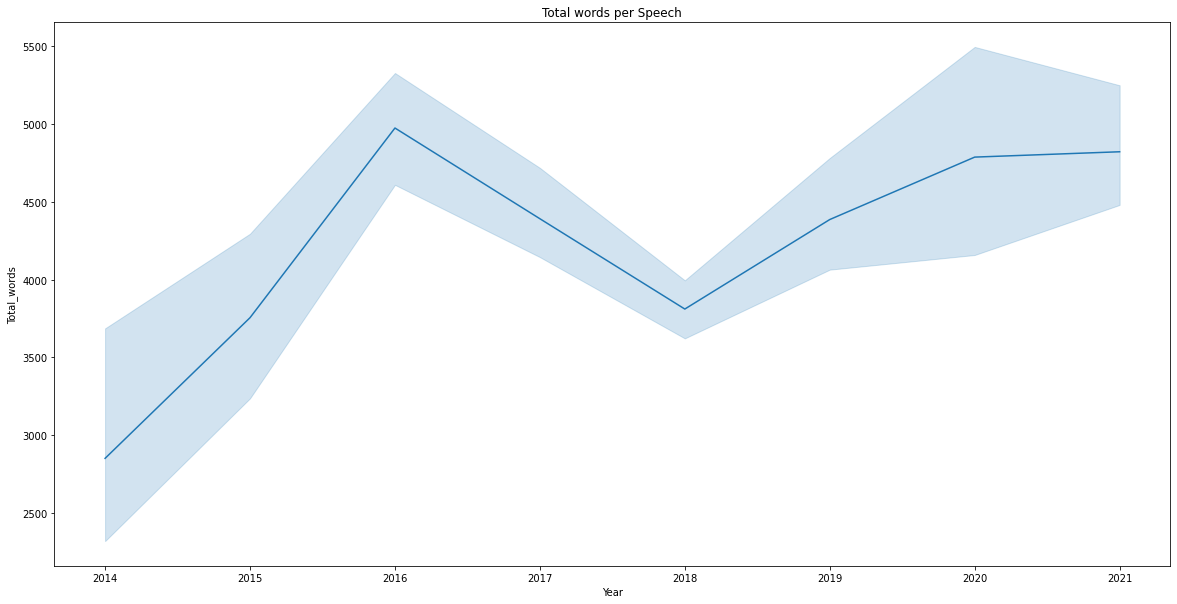

In [7]:
plt.figure(figsize = (20,10))
sns.lineplot(x = df2.Year, y = df2.Total_words).set(title = "Total words per Speech")
plt.show()

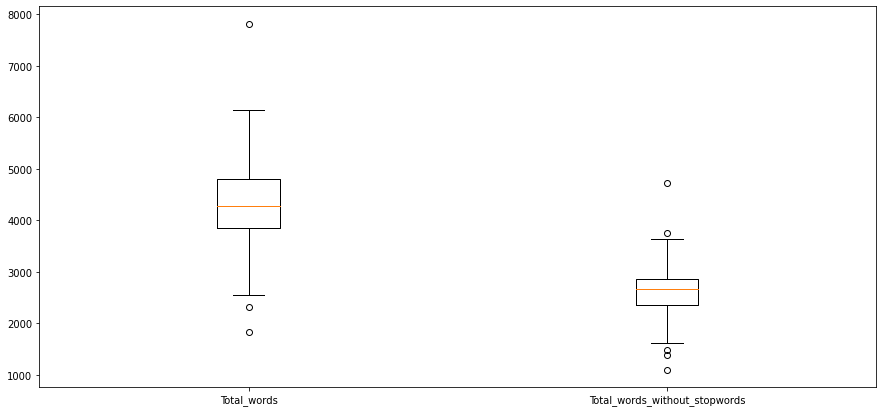

In [8]:

temp_df = df2[['Total_words','Words_without_stop']]

plt.figure(figsize = (15,7))
plt.boxplot([df2['Total_words'], df2['Words_without_stop']],labels = ['Total_words','Total_words_without_stopwords'])

plt.show()

<AxesSubplot:ylabel='Episode'>

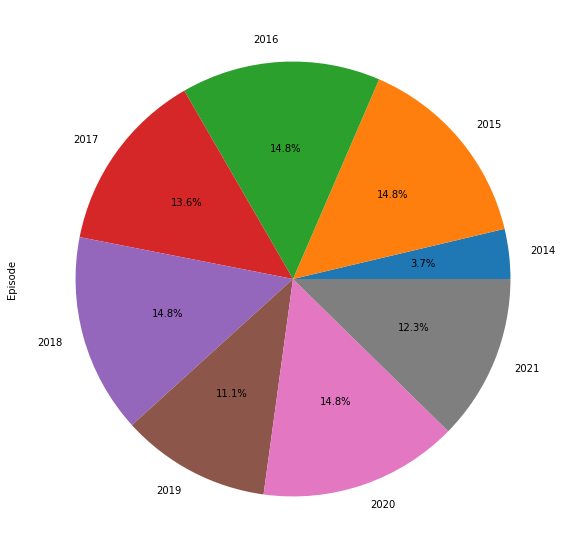

In [9]:
fig,ax = plt.subplots()
df2.groupby("Year")["Episode"].count().plot.pie(figsize = (10,10), autopct = '%1.1f%%')

In [10]:
from nltk import FreqDist
dist = FreqDist(x for x in all_text.split(' ') if x.isalnum())
common_words = pd.DataFrame(dist.most_common(10), columns = ['Word', 'Frequency'])

In [11]:
common_words

,Word,Frequency
0,people,1498
1,also,1387
2,india,1321
3,country,1245
4,one,1049
5,many,975
6,us,799
7,countrymen,746
8,time,731
9,new,726


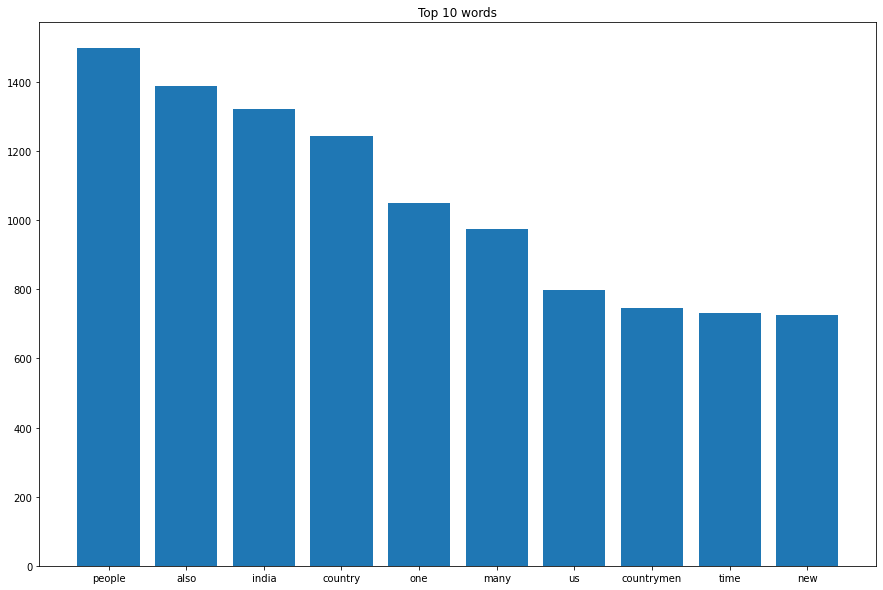

In [12]:
plt.figure(figsize = (15,10))
plt.bar(common_words['Word'],common_words['Frequency'])
plt.title("Top 10 words")
plt.show()